<a href="https://colab.research.google.com/github/aristriana/repokuhh_aw/blob/main/Copy_of_CaseStudy_EDA_Property_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong>Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</strong></h2></center>

<h3><i> Kelompok G </i></h3>

<h4> Anggota Kelompok: </h4>

1. Adriaan Aylsworth Waleleng
1. Aristriana Muhamad (2106709043)
1. Kamal Muftie Yafi (2106725034)
1. Ryan Caleb (2006571002)

# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" (cukup ipynb saja) dengan cara melakukan **EDA** pada data yang diterima dari DE/DBA.

## Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

## Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
* Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

## *Data Understanding* (DU):

Keterangan Variabel:
* `Created_at`: Tanggal dimana iklan rumah dibuat
* `LT` : Luas Tanah properti yang ditawarkan
* `LB` : Luas Bangunan properti yang ditawarkan
* `KT` : Jumlah Kamar Tidur properti yang ditawarkan
* `KM` : Jumlah Kamar Mandi properti yang ditawarkan
* `Garasi` : Jumlah Kapasitas Garasi di properti yang ditawarkan
* `Carport` : Kapasitas Carport di properti yang ditawarkan
* `Lokasi` : Detail lokasi properti yang ditawarkan
* `Sertifikat`: Jenis sertifikat properti yang ditawarkan
* `Listrik` : Daya listrik dari properti yang ditawarkan
* `Hadap` : Keterangan property yang ditawarkan menghadap ke arah mana
* `Harga` : Harga property yang ditawarkan dalam Rupiah
* `URL` : Alamat tautan (link) property yang ditawarkan.
* `Deskripsi` : Deskripsi iklan property yang ditawarkan.

# *Import library/packages & data*

## *Import modules*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

## *Import* Data

In [ ]:
!gdown 1bX2XqiOGFEszgmqMc5Ym2meC0qeNQEeQ

Downloading...
From: https://drive.google.com/uc?id=1bX2XqiOGFEszgmqMc5Ym2meC0qeNQEeQ
To: /content/Data-Property-Indonesia-Ganjil-2023.xlsx
100% 779k/779k [00:00<00:00, 134MB/s]


In [ ]:
xlsx = pd.ExcelFile("/content/Data-Property-Indonesia-Ganjil-2023.xlsx")

In [ ]:
locations = ['Bogor', 'Lampung - Sumatera selatan', 'Semarang', 'Kalimantan (All)', 'Depok', 'Tangerang', 'Jakarta',
             'Bekasi', 'Padang - Palembang', 'Bandung', 'Medan', 'Surabaya', 'Yogyakarta', 'Bali', 'Sulawesi(All)']

In [ ]:
df = {}
for loc in locations:
  df[loc] = pd.read_excel(xlsx, f'{loc}') # Read worksheet
  df[loc].columns = df[loc].columns.str.lower() # Standardize name: lowercase
  df[loc].columns = df[loc].columns.str.replace(' ', '') # Standardize name: remove space
  df[loc].rename(columns = {'lt(m2)':'lt',
                            'lt(m²)':'lt',
                            'lb(m²)':'lb',
                            'lb(m2)':'lb',
                            'harga(rp)':'harga'}, inplace = True) # Rename columns
  df[loc] = df[loc][['created_at','lt','lb','kt','km','garasi','carport','lokasi','sertifikat','listrik','hadap','harga','url','deskripsi']] # Drop unnamed columns
  df[loc]['kota'] = [loc for i in range(df[loc].shape[0])] # Add city details

In [ ]:
for loc in locations:
  print(df[loc].columns)

Index(['created_at', 'lt', 'lb', 'kt', 'km', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'url', 'deskripsi', 'kota'],
      dtype='object')
Index(['created_at', 'lt', 'lb', 'kt', 'km', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'url', 'deskripsi', 'kota'],
      dtype='object')
Index(['created_at', 'lt', 'lb', 'kt', 'km', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'url', 'deskripsi', 'kota'],
      dtype='object')
Index(['created_at', 'lt', 'lb', 'kt', 'km', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'url', 'deskripsi', 'kota'],
      dtype='object')
Index(['created_at', 'lt', 'lb', 'kt', 'km', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'url', 'deskripsi', 'kota'],
      dtype='object')
Index(['created_at', 'lt', 'lb', 'kt', 'km', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap'

In [ ]:
df['Bogor']

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
0,2021-03-12 00:00:00,75,38,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",Bogor
1,2021-06-12 00:00:00,60,40,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
2,2021-06-12 00:00:00,60,50,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
3,2021-06-12 00:00:00,60,70,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
4,2021-06-12 00:00:00,90,60,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,16-08-2023,60,45,2,1,0,1,Cihampar,SHGB,1300,NaN,350000000,https://www.rumah123.com/properti/bogor/hos145...,Rumah Di Perumahan Griya Soka 1,Bogor
291,2023-07-06 00:00:00,89,50,2,1,0,1,Cihampar,SHM,2200,NaN,699000000,https://www.rumah123.com/properti/bogor/hos139...,Cluster ini merupakan Perumahan Ekslusif di Ko...,Bogor
292,17-05-2023,120,100,3,2,0,2,Cihampar,SHM,1300,Timur,1350000000,https://www.rumah123.com/properti/bogor/hos137...,Rumah Siap Huni di Bukit Bogor Raya Blok I 20 ...,Bogor
293,16-09-2023,85,60,3,2,0,1,Cihampar,SHM,1300,Timur,530000000,https://www.rumah123.com/properti/bogor/hos131...,Perumahan di Tamansari hill akses masuk mobil ...,Bogor


In [ ]:
# Joining datasets
loclist = []
for loc in locations:
  loclist.append(df[loc])
df_full = pd.concat(loclist, axis = 0, ignore_index = True)

In [ ]:
df_full

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
0,2021-03-12 00:00:00,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",Bogor
1,2021-06-12 00:00:00,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
2,2021-06-12 00:00:00,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
3,2021-06-12 00:00:00,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
4,2021-06-12 00:00:00,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,Timur,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...,Sulawesi(All)
3080,18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,-,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ...",Sulawesi(All)
3081,17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,-,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...,Sulawesi(All)
3082,14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,Utara,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...,Sulawesi(All)


# *Pre-processing*

## *Handling Missing Value* (NaNs)

In [ ]:
df_full.isna().sum()

created_at      18
lt              17
lb              19
kt              20
km              22
garasi        1070
carport        573
lokasi          18
sertifikat      27
listrik        242
hadap         1684
harga           20
url             21
deskripsi       43
kota             0
dtype: int64

Baris dengan missing values pada seluruh kolomnya selain `deskripsi` dan/atau `created_at` akan di *drop*.

In [ ]:
df_full.dropna(subset = df_full.columns.difference(['kota','deskripsi','created_at']), how='all', inplace = True)

In [ ]:
df_full.isna().sum()

created_at       1
lt               0
lb               2
kt               3
km               5
garasi        1053
carport        556
lokasi           1
sertifikat      10
listrik        225
hadap         1667
harga            3
url              4
deskripsi       26
kota             0
dtype: int64

Cek baris dengan `created_at` yang kosong.

In [ ]:
df_full.loc[df_full['created_at'].isnull()]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
1931,NaN,Keterangan = Harga dalam bentuk juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Padang - Palembang


Baris dengan missing values pada seluruh kolomnya selain `lt` akan di *drop*.

In [ ]:
df_full.dropna(subset = df_full.columns.difference(['kota','lt']), how='all', inplace = True)

Cek baris dengan `lb` yang kosong.

In [ ]:
df_full.loc[df_full['lb'].isnull()]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
299,2021-05-12 00:00:00,391,NaN,7.0,7.0,NaN,NaN,"Teluk Betung Utara, Bandar Lampung",SHM,Token,NaN,1000000000,https://rumahdijual.com/lampung/10121111-rumah...,"sumber air tanah, bebas banjir, butuh renovasi",Lampung - Sumatera selatan


Melalui pengaksesan link kembali pada [cache Rumah123](https://webcache.googleusercontent.com/search?q=cache:-dnAUkm6GJMJ:https://www.rumah123.com/properti/bandar-lampung/hos13479350/&cd=9&hl=id&ct=clnk&gl=id) dari Google, diperoleh bahwa nilai asli dari `lb` (luas bangunan) data di atas adalah $367m^2$. Maka, kami akan melakukan pengisian nilai secara manual.

In [ ]:
df_full.at[299,'lb'] = '367'

In [ ]:
df_full.loc[[299]]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
299,2021-05-12 00:00:00,391,367,7.0,7.0,NaN,NaN,"Teluk Betung Utara, Bandar Lampung",SHM,Token,NaN,1000000000,https://rumahdijual.com/lampung/10121111-rumah...,"sumber air tanah, bebas banjir, butuh renovasi",Lampung - Sumatera selatan


Isi *missing values* dengan nilai 0 pada kolom `garasi`, `carport`, `kt`, dan `km` dengan asumsi tidak terdapat karakteristik tersebut, serta `Tidak ada` pada kolom `sertifikat` dengan asumsi tidak ada sertifikat pada rumah tersebut.

In [ ]:
df_full['garasi'].fillna(0, inplace = True)
df_full['carport'].fillna(0, inplace = True)
df_full['kt'].fillna(0, inplace = True)
df_full['km'].fillna(0, inplace = True)
df_full['sertifikat'].fillna('Tidak ada', inplace = True)

Drop kolom dengan nilai `harga` yang kosong.

In [ ]:
df_full.dropna(subset = ['harga'], inplace = True)

Hitung kembali *missing values*

In [ ]:
df_full.isna().sum()

created_at       0
lt               0
lb               0
kt               0
km               0
garasi           0
carport          0
lokasi           0
sertifikat       0
listrik        224
hadap         1664
harga            0
url              1
deskripsi       23
kota             0
dtype: int64

## *Duplicate values*

In [ ]:
df_full[df_full.duplicated()]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
2108,23-08-2023,980,360.0,4,4,2.0,4.0,Kota Baru Parahyangan,SHM,11000.0,Selatan,16800000000.0,https://www.rumah123.com/properti/bandung/hos1...,"Rumah Mewah Luxury 2 Lantai, Mainroad Kota Bar...",Bandung
2110,19-09-2023,148,150.0,3,2,0.0,1.0,Cicendo,SHM,3500.0,NaN,2200000000.0,https://www.rumah123.com/properti/bandung/hos1...,"Lt 148\nLb 150\nKt 3\nKm 2\nListrik 3,500\nSum...",Bandung
2202,2021-06-12 00:00:00,108,60.0,2.0,1.0,1.0,1.0,Medan Johor,"PPJB,Girik,Adat,dll",1300.0,NaN,375000000,https://www.rumah123.com/properti/medan/hos929...,Rumah Murah Medan Johor - Karya Dharma\nHubung...,Medan
2657,2023-06-06 00:00:00,116,80.0,3,2,0.0,1.0,Umbulharjo,SHM,3300.0,Selatan,785000000,Rumah siap huni strategis di kota Yogyakarta d...,Dijual rumah minimalis full furnish dlm cluste...,Yogyakarta


In [ ]:
df_full.drop_duplicates(inplace = True)

In [ ]:
df_full.duplicated().sum()

0

## *Standardize variables*

### *Standardize datetime*

In [ ]:
df_full['created_at'] = pd.to_datetime(df_full['created_at'], errors = 'coerce').dt.strftime("%d-%m-%Y")

<ipython-input-24-a1c33968c054>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_full['created_at'] = pd.to_datetime(df_full['created_at'], errors = 'coerce').dt.strftime("%d-%m-%Y")


In [ ]:
df_full

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
0,12-03-2021,75,38.0,2,1,1,1,Bojonggede,SHM,1300,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",Bogor
1,12-06-2021,60,40.0,1,1,0,1,Babakan Madang,SHM,2200,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
2,12-06-2021,60,50.0,2,2,0,1,Babakan Madang,SHM,2200,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
3,12-06-2021,60,70.0,3,2,0,1,Babakan Madang,SHM,2200,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
4,12-06-2021,90,60.0,3,2,0,2,Babakan Madang,SHM,2200,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,19-09-2023,1030,467.0,2,1,0,1,"Malalayang, Manado",SHM,-,Timur,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...,Sulawesi(All)
3080,18-09-2023,96,96.0,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500,-,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ...",Sulawesi(All)
3081,17-09-2023,115,45.0,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300,-,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...,Sulawesi(All)
3082,14-09-2023,102,72.0,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",HGB,900,Utara,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...,Sulawesi(All)


### *Standardize* kamar tidur, kamar mandi, carport, dan garasi

In [ ]:
df_full['kt'].unique()

array([2, 1, 3, 4, 5, 8, 6, 109.0, 7.0, 0, 11.0, 9, 15, 10, 16, 14.0,
       13.0, 12, 19, 22, 28, '-', 20], dtype=object)

In [ ]:
df_full['km'].unique()

array([1, 2, 3, 6, 5, 4, 106.0, 7.0, 0, 11.0, 8, 9, 16.0, 10, 13.0, 43,
       12, 19, 29, 28, '-', 20], dtype=object)

In [ ]:
df_full['garasi'].unique()

array([1, 0, 2, 3, 5.0, 4.0, 6.0, 10.0, 7.0, 8.0, 13.0, '-'], dtype=object)

In [ ]:
df_full['carport'].unique()

array([1, 2, 0, 3, 8, 7, 4, 5, 6.0, 10.0, 9.0, 13.0, 19.0, '-'],
      dtype=object)

In [ ]:
kamar_dict = {'-': 0}
df_full['kt'].replace(kamar_dict, regex = True, inplace = True)
df_full['km'].replace(kamar_dict, regex = True, inplace = True)
df_full['garasi'].replace(kamar_dict, regex = True, inplace = True)
df_full['carport'].replace(kamar_dict, regex = True, inplace = True)

### *Standardize* jenis sertifikat

Terdapat beberapa jenis sertifikat rumah:
- Sertifikat Hak Milik (SHM)
- Hak Guna Bangunan (HGB)
- Girik atau Petok
- Serta Akta Jual Beli (AJB)
- Sertifikat Hak Satuan Rumah Susun (SHSRS)

In [ ]:
df_full['sertifikat'] = df_full['sertifikat'].str.lower()
df_full['sertifikat'] = df_full['sertifikat'].str.replace(" ", "")

In [ ]:
df_full['sertifikat'].value_counts()

shm                             2724
shgb                             121
hgb                              117
lainnya(ppjb,girik,adat,dll)      23
shm+imb                           17
lainnya                           14
ppjb                              11
tidakada                           9
sppjb                              4
shm-imb                            4
hp                                 3
shm,imb                            2
-                                  2
ajb                                1
hakpakai                           1
shm+hakpakai                       1
hjb                                1
ppjb,girik,adat,dll                1
shm&imb                            1
shbg                               1
smb                                1
shm+imb+pbb                        1
Name: sertifikat, dtype: int64

In [ ]:
sertif_dict = {re.compile('^(shm)$'): 'SHM',
               re.compile('^(shm&imb)$'): 'SHM',
               re.compile('^(shm\-imb)$'): 'SHM',
               re.compile('^(shm\+imb)$'): 'SHM',
               re.compile('^(shm\,imb)$'): 'SHM',
               re.compile('^(shm\+imb\+pbb)$'): 'SHM',
               re.compile('^(shm\+hakpakai)$'): 'SHM',

               re.compile('^(shgb)$'): 'SHGB',
               re.compile('^(hgb)$'): 'SHGB',
               re.compile('^(shbg)$'): 'SHGB',

               re.compile('^(lainnya\(ppjb\,girik\,adat\,dll\))$'): 'Lainnya',
               re.compile('^(ppjb\,girik\,adat\,dll)$'): 'Lainnya',
               re.compile('^(sppjb)$'): 'Lainnya',
               re.compile('^(ppjb)$'): 'Lainnya',
               re.compile('^(hjb)$'): 'Lainnya',
               re.compile('^(ajb)$'): 'Lainnya',
               re.compile('^(hp)$'): 'Lainnya',
               re.compile('^(hakpakai)$'): 'Lainnya',
               re.compile('^(smb)$'): 'Lainnya',
               re.compile('^(lainnya)$'): 'Lainnya',

               re.compile('^(tidakada)$'): 'Tidak ada',
               re.compile('^(\-)$'): 'Tidak ada'}
df_full['sertifikat'].replace(sertif_dict, regex = True, inplace = True)

In [ ]:
df_full['sertifikat'].value_counts()

SHM          2750
SHGB          239
Lainnya        60
Tidak ada      11
Name: sertifikat, dtype: int64

### *Standardize* hadap

In [ ]:
df_full['hadap'] = df_full['hadap'].str.lower()
df_full['hadap'] = df_full['hadap'].str.replace(" ", "")

In [ ]:
df_full['hadap'].value_counts()

timur                  387
utara                  320
selatan                314
barat                  175
-                       83
timurlaut               32
tenggara                27
baratdaya               23
baratlaut               15
utara-barat              4
timur-selatan            2
utara-timur              2
utaradantimur(hook)      1
timur-utara              1
selatan-barat            1
utara-selatan            1
timurutara               1
selatandantimur          1
barat&selatan            1
selatan&barat            1
selatandanutara          1
selatandanbarat          1
danau                    1
selatan,utara            1
timur,utara              1
selatan/timur            1
Name: hadap, dtype: int64

In [ ]:
hadap_dict = {'-': np.nan,
              'danau': np.nan,
              re.compile('^(timur)$'): 'Timur',
              re.compile('^(tenggara)$'): 'Tenggara',
              re.compile('^(selatan)$'): 'Selatan',
              re.compile('^(baratdaya)$'): 'Barat Daya',
              re.compile('^(barat)$'): 'Barat',
              re.compile('^(baratlaut)$'): 'Barat Laut',
              re.compile('^(utara)$'): 'Utara',
              re.compile('^(timurlaut)$'): 'Timur Laut',

              re.compile('^(utara\-timur)$'): 'Utara/Timur',
              re.compile('^(utaradantimur\(hook\))$'): 'Utara/Timur',
              re.compile('^(timur\-utara)$'): 'Utara/Timur',
              re.compile('^(timur\,utara)$'): 'Utara/Timur',
              re.compile('^(timurutara)$'): 'Utara/Timur',

              re.compile('^(utara\-barat)$'): 'Utara/Barat',

              re.compile('^(timur\-selatan)$'): 'Timur/Selatan',
              re.compile('^(selatan\/timur)$'): 'Timur/Selatan',
              re.compile('^(selatandantimur)$'): 'Timur/Selatan',

              re.compile('^(selatan\-barat)$'): 'Selatan/Barat',
              re.compile('^(barat&selatan)$'): 'Selatan/Barat',
              re.compile('^(selatan&barat)$'): 'Selatan/Barat',
              re.compile('^(selatandanbarat)$'): 'Selatan/Barat',

              re.compile('^(selatandanutara)$'): 'Utara/Selatan',
              re.compile('^(selatan\,utara)$'): 'Utara/Selatan',
              re.compile('^(utara-\selatan)$'): 'Utara/Selatan'}
df_full['hadap'].replace(hadap_dict, regex = True, inplace = True)

In [ ]:
df_full['hadap'].value_counts()

Timur            387
Utara            320
Selatan          314
Barat            175
Timur Laut        32
Tenggara          27
Barat Daya        23
Barat Laut        15
Utara/Timur        3
Selatan/Barat      3
Utara/Selatan      2
Timur/Selatan      2
Name: hadap, dtype: int64

### *Standardize* harga

#### *Format cleaning*

In [ ]:
df_full['harga'].unique()

array([692550000, 811400000, 900500000, 1001900000, 1200800000,
       1538200000, 1946600000, 1230000000, 617000000, 500000000,
       250000000, 679000000, 1800000000, 850000000, 1350000000,
       1000000000, 450000000, 800000000, 593000000, 671000000, 467600000,
       200000000, 310000000, 820000000, 599000000, 9900000000, 7300000000,
       891500000, 420000000, 241000000, 390000000, 379000000, 2900000000,
       15000000000, 600000000, 3700000000, 460000000, 880000000,
       2100000000, 760000000, 3200000000, 574600000, 916000000, 810000000,
       3128000000, 2536000000, 750000000, 2975000000, 350000000,
       670000000, 2128000000, 130000000, 1250000000, 1450000000,
       1500000000, 1850000000, 840950000, 399000000, 456000000, 397223000,
       551834000, 485000000, 715000000, 378990000, 368000000, 925045000,
       1621400000, 488500000, 795000000, 221000000, 239999999, 205000000,
       1400000000, 650000000, 2500000000, 633150000, 550000000, 377684362,
       4500000000

In [ ]:
harga_dict = {'Rp. ': '',
              'Rp.': '',
              'RP. ': ''}
df_full['harga'].replace(harga_dict, regex = True, inplace = True)

In [ ]:
df_full['harga'].unique()

array([692550000, 811400000, 900500000, 1001900000, 1200800000,
       1538200000, 1946600000, 1230000000, 617000000, 500000000,
       250000000, 679000000, 1800000000, 850000000, 1350000000,
       1000000000, 450000000, 800000000, 593000000, 671000000, 467600000,
       200000000, 310000000, 820000000, 599000000, 9900000000, 7300000000,
       891500000, 420000000, 241000000, 390000000, 379000000, 2900000000,
       15000000000, 600000000, 3700000000, 460000000, 880000000,
       2100000000, 760000000, 3200000000, 574600000, 916000000, 810000000,
       3128000000, 2536000000, 750000000, 2975000000, 350000000,
       670000000, 2128000000, 130000000, 1250000000, 1450000000,
       1500000000, 1850000000, 840950000, 399000000, 456000000, 397223000,
       551834000, 485000000, 715000000, 378990000, 368000000, 925045000,
       1621400000, 488500000, 795000000, 221000000, 239999999, 205000000,
       1400000000, 650000000, 2500000000, 633150000, 550000000, 377684362,
       4500000000

In [ ]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('.', ''))
    return(x)

In [ ]:
df_full['harga'] = df_full['harga'].apply(clean_currency).astype('int')

In [ ]:
df_full['harga'].unique()

array([    692550000,     811400000,     900500000,    1001900000,
          1200800000,    1538200000,    1946600000,    1230000000,
           617000000,     500000000,     250000000,     679000000,
          1800000000,     850000000,    1350000000,    1000000000,
           450000000,     800000000,     593000000,     671000000,
           467600000,     200000000,     310000000,     820000000,
           599000000,    9900000000,    7300000000,     891500000,
           420000000,     241000000,     390000000,     379000000,
          2900000000,   15000000000,     600000000,    3700000000,
           460000000,     880000000,    2100000000,     760000000,
          3200000000,     574600000,     916000000,     810000000,
          3128000000,    2536000000,     750000000,    2975000000,
           350000000,     670000000,    2128000000,     130000000,
          1250000000,    1450000000,    1500000000,    1850000000,
           840950000,     399000000,     456000000,     397223

#### *Noise cleaning*

##### Di atas 1 Triliun

In [ ]:
df_full.loc[df_full.harga >= 1000000000000, "harga"]

2133    1500000000000
2918    2500000000000
Name: harga, dtype: int64

Terdapat dua rumah yang harganya sangat tinggi, di atas 1 Triliun. Oleh karena itu, akan dicek apakah benar nilainya.

In [ ]:
df_full.loc[[2918]]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
2918,07-08-2023,250.0,436.0,5.0,3.0,0.0,0.0,Semarapura,SHM,6600.0,NaN,2500000000000,https://www.rumah123.com/properti/semarapura/h...,"Rumah Dijual Semarapura Ada 2 sertifikat, masi...",Bali


Melalui penelusuran pada [url tersebut](https://www.rumah123.com/properti/semarapura/hos12342924/), diperoleh bahwa harga sebenarnya **tidaklah 2,5 triliun**, tetapi **hanya 2,5 miliar**. Maka, dengan asumsi tersebut, kami akan hapus tiga angka 0 di belakang.

In [ ]:
df_full.loc[df_full.harga >= 1000000000000, "harga"] = df_full.harga / 1000 # kurangi tiga angka 0

##### Di bawah 1 Juta

Selanjutnya, terdapat banyak rumah yang harganya sangat rendah, di bawah 1 juta. Oleh karena itu, akan dicek apakah benar nilainya.

In [ ]:
df_full.loc[df_full.harga < 1000000, "harga"]

892     2100
893      250
894      250
895      250
896      350
        ... 
1306     170
1307    2993
1308    1088
1309    1385
1310    3890
Name: harga, Length: 277, dtype: int64

Melalui penelusuran pada [url tersebut](https://www.rumah123.com/properti/palembang/hos14252938/), diperoleh bahwa harga sebenarnya **tidaklah 1550**, tetapi **1,55 miliar**. Maka, dengan asumsi tersebut, kami akan tambah enam angka 0 di belakang.

In [ ]:
df_full.loc[df_full.harga < 1000000, "harga"] = df_full.harga * 1000000 # tambah enam angka 0

##### Di bawah 10 Juta

Namun, masih terdapat beberapa rumah yang harganya sangat rendah, di bawah 10 juta. Oleh karena itu, akan dicek apakah benar nilainya.

In [ ]:
df_full.loc[df_full.harga < 10000000, "harga"]

1494    2200000
1495    3500000
1496    6500000
1497    3300000
1499    5500000
1500    6900000
Name: harga, dtype: int64

In [ ]:
df_full.loc[[1494]]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
1494,19-09-2023,85,150.0,3.0,3.0,1.0,0.0,Jakarta Selatan,SHM,2200.0,NaN,2200000,https://www.rumah.com/listing-properti/dijual-...,Dijual rumah di JL Kebon Baru dekat Asem Baris...,Jakarta


Melalui penelusuran pada [url tersebut](https://www.rumah.com/listing-properti/dijual-tebet-oleh-abdurrahman-siddiq-21085904), diperoleh bahwa harga sebenarnya **tidaklah 2,2 juta**, tetapi **2,2 miliar**. Maka, dengan asumsi tersebut, kami akan tambah tiga angka 0 di belakang.

In [ ]:
df_full.loc[df_full.harga < 10000000, "harga"] = df_full.harga * 1000 # tambah tiga angka 0

Kemudian, masih terdapat beberapa rumah yang harganya sangat kecil dan perlu dicurigai.

In [ ]:
df_full['harga'].sort_values().head(10)

1498    12500000
1501    16500000
476     30000000
314     30000000
2702    40000000
957     41000000
138     65000000
151     65000000
124     65000000
316     68500000
Name: harga, dtype: int64

##### Di bawah 100 Juta (Kota Jakarta)

Diperoleh bahwa terdapat dua rumah di Jakarta yang harganya masih di bawah 100 juta.

In [ ]:
df_full.loc[(df_full.harga < 100000000) & (df_full.kota == 'Jakarta'), "harga"]

1498    12500000
1501    16500000
Name: harga, dtype: int64

In [ ]:
df_full.loc[[1501]]

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
1501,19-09-2023,350,438.0,5.0,5.0,0.0,2.0,Jakarta Utara,Lainnya,4400.0,NaN,16500000,https://www.rumah.com/listing-properti/dijual-...,*Rumah PIK Golf Island*,Jakarta


Melalui penelusuran pada [url tersebut](https://www.rumah.com/listing-properti/dijual-rumah-pik-golf-island-oleh-denny-tirtha-21928337#location), diperoleh bahwa harga sebenarnya **tidaklah 16,5 juta**, tetapi **16,5 miliar**. Maka, dengan asumsi tersebut, kami akan tambah tiga angka 0 di belakang.

In [ ]:
df_full.loc[(df_full.harga < 100000000) & (df_full.kota == 'Jakarta'), "harga"] = df_full.harga * 1000 # tambah tiga angka 0

### *Standardize* listrik

In [ ]:
df_full['listrik'].unique()

array([1300, 2200, 3500, 17600, 900, 5500, 4400, 6600, 16500,
       '450 Va/R-1', '3500 Watt', 'Token', '1300 Watt', '900 Watt', nan,
       '1300 KWh', '2300 Watt', 'Lainnya', '2200 Watt', '3500 KWh',
       '2400 Watt', '3300 Watt', '4400 Watt', '5500 Watt', 'Lainnya Watt',
       1200, 3300, 2000, 450, 33000, 13200, 7700.0, 11000.0, 3000.0,
       19000.0, 7600.0, 8000.0, 10000.0, 23000.0, 10600.0, 66000.0,
       18000.0, 4500.0, 13000.0, 26400.0, 9900.0, 9500.0, 0.0, 16000.0,
       3900.0, 220, 2400, 400, 2300, 4000.0, 13900.0, 2500.0, 15000,
       11500.0, 130.0, 5000.0, 7500.0, 13300.0, 22000.0, 38500.0, '-',
       4899], dtype=object)

In [ ]:
listrik_dict = {'-': np.nan,
                0: np.nan,
                'Lainnya Watt': np.nan,
                'Lainnya': np.nan,
                ' Watt': '',
                ' KWh': '',
                ' Va/R-1': '',
                'Token': np.nan,
                'nan': np.nan}
df_full['listrik'].replace(listrik_dict, regex = True, inplace = True)

In [ ]:
df_full['listrik'] = df_full['listrik'].astype('float')

In [ ]:
df_full['listrik'].unique()

array([ 1300.,  2200.,  3500., 17600.,   900.,  5500.,  4400.,  6600.,
       16500.,    nan,  2300.,  2400.,  3300.,  1200.,  2000.,   450.,
       33000., 13200.,  7700., 11000.,  3000., 19000.,  7600.,  8000.,
       10000., 23000., 10600., 66000., 18000.,  4500., 13000., 26400.,
        9900.,  9500., 16000.,  3900.,   220.,   400.,  4000., 13900.,
        2500., 15000., 11500.,   130.,  5000.,  7500., 13300., 22000.,
       38500.,  4899.])

## Ubah tipe variabel yang sesuai

In [ ]:
change_int = ['lt', 'lb', 'kt', 'km', 'garasi', 'carport']
for var in change_int:
  df_full[var] = df_full[var].astype(int)

In [ ]:
df_full['created_at'] = pd.to_datetime(df_full['created_at'])

<ipython-input-62-4cf2bd5f64d6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_full['created_at'] = pd.to_datetime(df_full['created_at'])


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3060 entries, 0 to 3083
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  3060 non-null   datetime64[ns]
 1   lt          3060 non-null   int64         
 2   lb          3060 non-null   int64         
 3   kt          3060 non-null   int64         
 4   km          3060 non-null   int64         
 5   garasi      3060 non-null   int64         
 6   carport     3060 non-null   int64         
 7   lokasi      3060 non-null   object        
 8   sertifikat  3060 non-null   object        
 9   listrik     2796 non-null   float64       
 10  hadap       1303 non-null   object        
 11  harga       3060 non-null   int64         
 12  url         3059 non-null   object        
 13  deskripsi   3037 non-null   object        
 14  kota        3060 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(6)
memory usage: 447.

## *Handling outlier*

Akan dilakukan pemisahan terhadap outlier dari data

<Axes: >

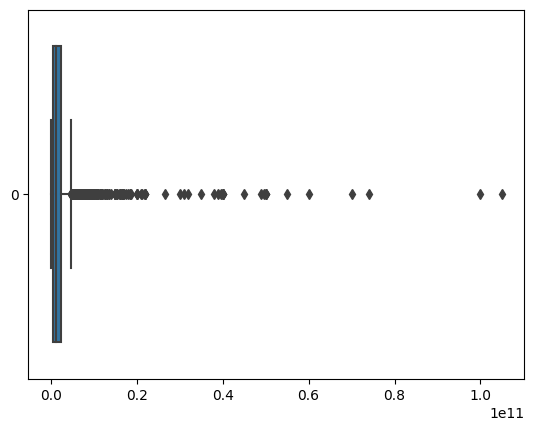

In [ ]:
sns.boxplot(df_full['harga'], orient="h")

In [ ]:
# IQR
Q1 = np.percentile(df_full['harga'], 25, method='midpoint')
Q3 = np.percentile(df_full['harga'], 75, method='midpoint')
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Above Upper bound
upper_array = np.array(df_full['harga'] > upper)
print("Upper Bound:", upper)
print(upper_array.sum())

#Below Lower bound
lower_array = np.array(df_full['harga'] < lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 4750000000.0
292
Lower Bound: -1890000000.0
0


In [ ]:
outliers = df_full[(df_full['harga'] < lower) | (df_full['harga'] > upper)]
outliers

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
26,2021-12-06,1500,1200,8,6,0,8,Cileungsi,SHM,17600.0,NaN,9900000000,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob...",Bogor
27,2021-12-06,699,350,5,5,0,2,Babakan Madang,SHM,3500.0,NaN,7300000000,https://www.rumah.com/listing-properti/dijual-...,"Plus kolam renang Babakan Madang, dekat dengan...",Bogor
37,2021-12-06,1272,500,4,5,0,2,Babakan Madang,SHM,5500.0,NaN,15000000000,https://www.rumah.com/listing-properti/dijual-...,Rumah best view,Bogor
100,2021-12-02,800,400,6,6,2,2,Babakan Madang,SHM,5500.0,NaN,7000000000,https://www.rumah123.com/properti/bogor/hos926...,"Lokasi strategis, view bagus, aman (one gate s...",Bogor
103,2021-12-02,437,340,5,5,2,2,Megamendung,SHGB,5500.0,NaN,5500000000,https://www.rumah123.com/properti/bogor/hos926...,"Lokasi strategis, ada kolam renang",Bogor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,2021-10-29,719,1124,7,8,7,7,"Malalayang, Manado",SHM,5500.0,Timur,9000000000,https://www.rumah123.com/properti/manado/hos90...,Rumah Mewah Manado\nView Laut dan Kota,Sulawesi(All)
3062,2023-07-13,1320,1000,8,8,5,3,"Malalayang, Manado",SHM,22000.0,Timur,9500000000,https://www.rumah123.com/properti/manado/hos11...,Dijual istana/rumah mewah di kawasan perumahan...,Sulawesi(All)
3063,2023-09-07,863,447,3,3,2,2,"Bunaken, Manado",SHM,5500.0,NaN,4900000000,https://www.rumah123.com/properti/manado/hos14...,DIJUAL CEPAT VILLA CANTIK DENGAN VIEW PANTAI I...,Sulawesi(All)
3069,2023-07-21,300,267,6,5,1,1,"Tamalanrea, Makassar",SHM,3500.0,NaN,7100000000,https://www.rumah.com/listing-properti/dijual-...,Dijual cepat rumah mewah dikota Makassar lengk...,Sulawesi(All)


In [ ]:
# Separating outliers from the full data
df_full.drop(outliers.index, inplace = True)

## *Impute missing values*

In [ ]:
median_listrik = df_full['listrik'].median()
df_full['listrik'].fillna(median_listrik, inplace = True)

## Cek kembali data

In [ ]:
df_full.isna().sum()

created_at       0
lt               0
lb               0
kt               0
km               0
garasi           0
carport          0
lokasi           0
sertifikat       0
listrik          0
hadap         1602
harga            0
url              1
deskripsi       19
kota             0
dtype: int64

In [ ]:
df_full

,created_at,lt,lb,kt,km,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,url,deskripsi,kota
0,2021-12-03,75,38,2,1,1,1,Bojonggede,SHM,1300.0,Barat,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka...",Bogor
1,2021-12-06,60,40,1,1,0,1,Babakan Madang,SHM,2200.0,NaN,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
2,2021-12-06,60,50,2,2,0,1,Babakan Madang,SHM,2200.0,NaN,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
3,2021-12-06,60,70,3,2,0,1,Babakan Madang,SHM,2200.0,NaN,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
4,2021-12-06,90,60,3,2,0,2,Babakan Madang,SHM,2200.0,NaN,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...,Bogor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,2023-09-19,1030,467,2,1,0,1,"Malalayang, Manado",SHM,2200.0,Timur,2300000000,https://www.99.co/id/properti/rumah-dijual-2mi...,*RUMAH DIJUAL MELALUI LELANG !!!*\n\nObjek : T...,Sulawesi(All)
3080,2023-09-18,96,96,2,1,0,1,"Tanjung Bunga, Makassar, Sulawesi Selatan",SHM,3500.0,NaN,675000000,https://www.rumah.com/listing-properti/dijual-...,"Dijual rumah siap huni di perumahan amarylis, ...",Sulawesi(All)
3081,2023-09-17,115,45,2,1,0,1,"Palu Selatan, Palu, Sulawesi Tengah",SHM,1300.0,NaN,348000000,https://www.rumah.com/listing-properti/dijual-...,Jual Cepat Rumah bagus dan strategis Jl. Bante...,Sulawesi(All)
3082,2023-09-14,102,72,2,1,0,1,"Puuwatu, Kendari. Sulawesi Tenggara",SHGB,900.0,Utara,175000000,https://www.99.co/id/properti/rumah-dijual-175...,PERUMAHAN AFIKA LAND & AFIKA RESIDENCE TIPE 36...,Sulawesi(All)


## Export data (*backup*)

In [ ]:
df_full.to_csv('Data-Property-Indonesia-Ganjil-2023-Cleaned.csv', index = False)

# *Exploratory Data Analysis (EDA)*

In [ ]:
#df_full.describe()[['harga']]

In [ ]:
#df_xout = df_full.loc[df_full['harga'] <= 2255000000]
#df_xout

##Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

[Text(0, 0, 'Bogor'),
 Text(1, 0, 'Lampung - Sumatera selatan'),
 Text(2, 0, 'Semarang'),
 Text(3, 0, 'Kalimantan (All)'),
 Text(4, 0, 'Depok'),
 Text(5, 0, 'Tangerang'),
 Text(6, 0, 'Jakarta'),
 Text(7, 0, 'Bekasi'),
 Text(8, 0, 'Padang - Palembang'),
 Text(9, 0, 'Bandung'),
 Text(10, 0, 'Medan'),
 Text(11, 0, 'Surabaya'),
 Text(12, 0, 'Yogyakarta'),
 Text(13, 0, 'Bali'),
 Text(14, 0, 'Sulawesi(All)')]

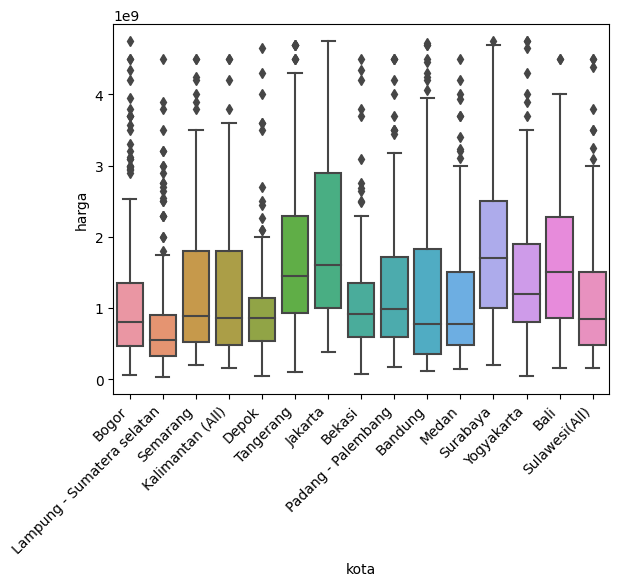

In [ ]:
harga_box = sns.boxplot(x = df_full['kota'], y = df_full['harga'])
harga_box.set_xticklabels(harga_box.get_xticklabels(), rotation=45, horizontalalignment='right')

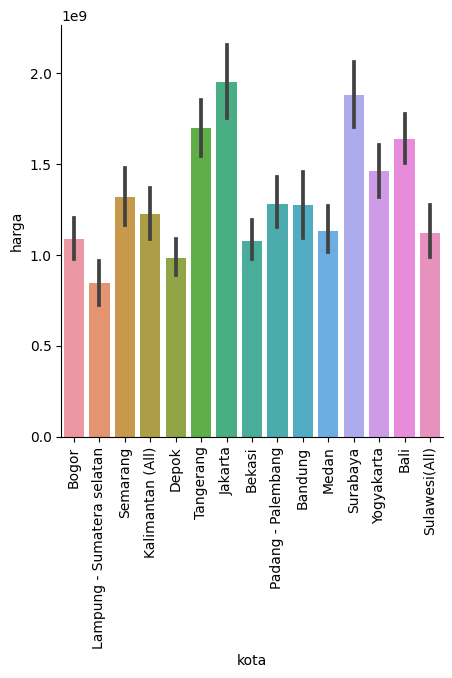

In [ ]:
harga_bar = sns.catplot(data=df_full, x="kota", y="harga", kind="bar")
harga_bar.set_xticklabels(rotation=90)

Dapat diketahui dari boxplot dan barplot bahwa terdapat kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain, dengan rumah di kota Jakarta yang paling cenderung mahal dibanding kota-kota lain dan rumah di Lampung-Sumatera Selatan paling cenderung murah dibanding kota-kota lain

##Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

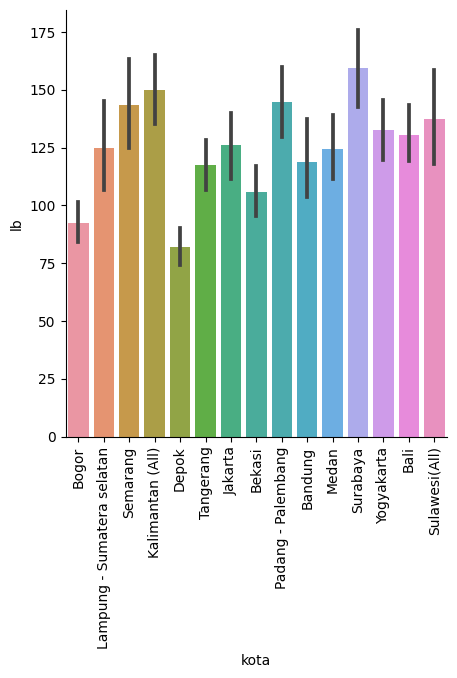

In [ ]:
lb_bar = sns.catplot(data=df_full, x="kota", y="lb", kind="bar")
lb_bar.set_xticklabels(rotation=90)

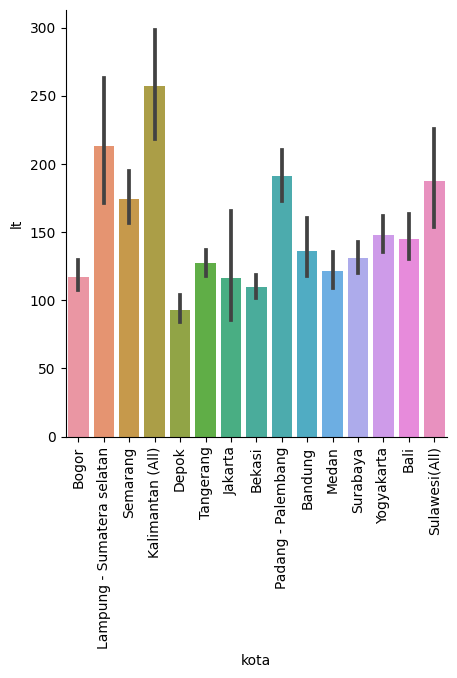

In [ ]:
lt_bar = sns.catplot(data=df_full, x="kota", y="lt", kind="bar")
lt_bar.set_xticklabels(rotation=90)

Terdapat beberapa rekomendasi tergantung preferensi dan/atau kondisi perusahaan:

Rekomendasi 1 (Surabaya): Bangunan yang paling cenderung luas dibanding kota-kota lain. Peluang investasi untuk rumah-rumah yang perlu renovasi. Namun, dengan harga rumah yang cenderung mahal.

Rekomendasi 2 (Kalimantan): Tanah paling cenderung luas daripada kota-kota lain, bangunan cenderung lebih luas daripada sebagian besar kota-kota lain, dengan harga yang cenderung tidak lebih mahal dari sebagian kota lain.

Rekomendasi 3 (Lampung - Sumatera Selatan): Harga paling cenderung murah dengan tanah dan bangunan yang luas. Dapat dilakukan pengembangan untuk meningkatkan harga jual. Namun, perlu dipertimbangkan alasan harga rumah di kota tersebut cenderung murah.

In [ ]:
outliers["kota"].value_counts()

Jakarta                       57
Surabaya                      48
Tangerang                     27
Bandung                       26
Semarang                      22
Yogyakarta                    17
Bali                          17
Kalimantan (All)              14
Sulawesi(All)                 13
Bogor                         12
Lampung - Sumatera selatan    10
Depok                         10
Padang - Palembang            10
Medan                          8
Bekasi                         1
Name: kota, dtype: int64

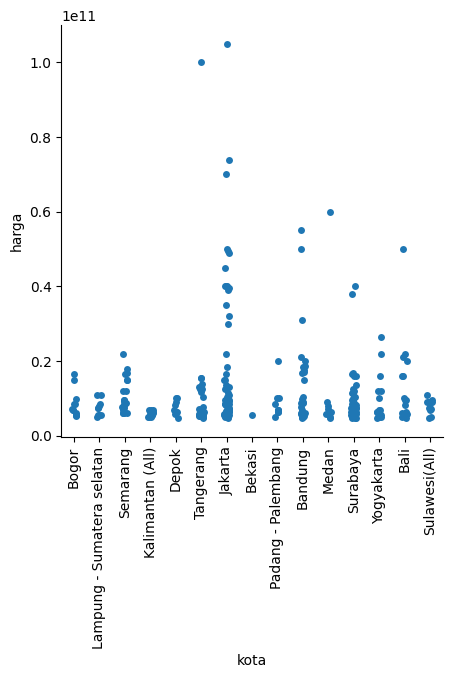

In [ ]:
out = sns.catplot(x="kota", y="harga", data=outliers)
out.set_xticklabels(rotation=90)